In [5]:
import numpy as np
import pandas as pd
import re

### 1. Load data
- Load file `superstore_dataset_dashboarddesign_clean.csv` vào biến `df`

In [6]:
# Get data path & data name
data_path = 'D:\\DA\\PhantichdulieuPython\\data\\'
data_name = 'superstore_dataset_dashboarddesign_clean.csv'

In [7]:
# Load data to Pandas object
df = pd.read_csv(data_path + data_name, encoding= 'unicode_escape')

### 2. Inspect data

- Show 3 dòng đầu

In [10]:
df.head(3)

,Order Date,Order ID,Product Name,Category,City,Country,Customer Name,Discount,Postal Code,Manufacturer,Profit,Profit Ratio,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,11/8/2017,CA-2017-152156,Bush Somerset Collection Bookcase,Furniture,Henderson,United States,Claire Gute,0.0,42420.0,Bush,42.0,0.16,2.0,South,262.0,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,11/8/2017,CA-2017-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Henderson,United States,Claire Gute,0.0,42420.0,Hon,220.0,0.30,3.0,South,732.0,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,6/12/2017,CA-2017-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.0,90036.0,Universal,7.0,0.47,2.0,West,15.0,Corporate,6/16/2017,Second Class,California,Labels


- Show 3 dòng cuối

In [11]:
df.tail(3)

,Order Date,Order ID,Product Name,Category,City,Country,Customer Name,Discount,Postal Code,Manufacturer,Profit,Profit Ratio,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
9991,6/6/2017,CA-2017-160717,Samsung Galaxy Mega 6.3,Technology,Santa Barbara,United States,Maria Etezadi,0.2,93101.0,Samsung,227.0,0.08,9.0,West,3024.0,Home Office,6/11/2017,Standard Class,California,Phones
9992,10/16/2018,CA-2018-159282,Swingline SM12-08 MicroCut Jam Free Shredder,Technology,Yuma,United States,Gary Hansen,0.7,85364.0,Other,-480.0,-0.80,5.0,West,600.0,Home Office,10/21/2018,Standard Class,Arizona,Machines
9993,4/17/2018,CA-2018-134845,Lexmark MX611dhe Monochrome Laser Printer,Technology,Louisville,United States,Sharelle Roach,0.7,80027.0,Other,-3400.0,-1.33,5.0,West,2550.0,Home Office,4/23/2018,Standard Class,Colorado,Machines


- Data có bao nhiêu dòng, bao nhiêu cột?

In [13]:
df.shape

(9994, 20)

In [7]:
print('Data có', df.shape[0],'hàng,',df.shape[1],'cột')

Data có 9994 hàng, 20 cột


In [8]:
print('Data có {} hàng, {} cột'.format(df.shape[0], df.shape[1]))

Data có 9994 hàng, 20 cột


- In ra list tên các cột

In [111]:
df.columns.tolist()

['Order Date',
 'Order ID',
 'Product Name',
 'Category',
 'City',
 'Country',
 'Customer Name',
 'Discount',
 'Postal Code',
 'Manufacturer',
 'Profit',
 'Profit Ratio',
 'Quantity',
 'Region',
 'Sales',
 'Segment',
 'Ship Date',
 'Ship Mode',
 'State',
 'Sub-Category']

- Kiểu dữ liệu của từng cột

In [112]:
df.dtypes

Order Date        object
Order ID          object
Product Name      object
Category          object
City              object
Country           object
Customer Name     object
Discount         float64
Postal Code      float64
Manufacturer      object
Profit           float64
Profit Ratio     float64
Quantity         float64
Region            object
Sales            float64
Segment           object
Ship Date         object
Ship Mode         object
State             object
Sub-Category      object
dtype: object

### 3. Transform cột

####  3.1. Đổi tên cột

- Biến tên cột về dạng chữ thường và snake_case

In [4]:
new_cols = [re.sub('[ ]','_',_).lower() for _ in df.columns.tolist()] # List comprehension
df.columns = new_cols

In [15]:
#khác
new_cols = []
for _ in df.columns.tolist():
    new_cols += [re.sub('[ -]','_',_).strip().lower()]
new_cols
df.columns = new_cols  

- In ra 1 dòng đầu để kiểm tra

In [16]:
df.head(1)

,order_date,order_id,product_name,category,city,country,customer_name,discount,postal_code,manufacturer,profit,profit_ratio,quantity,region,sales,segment,ship_date,ship_mode,state,sub_category
0,11/8/2017,CA-2017-152156,Bush Somerset Collection Bookcase,Furniture,Henderson,United States,Claire Gute,0.0,42420.0,Bush,42.0,0.16,2.0,South,262.0,Consumer,11/11/2017,Second Class,Kentucky,Bookcases


#### Tại sao phải chuyển tên cột về dạng "snake_case"?

1. Độ nhất quán và dễ đọc: "snake_case" giúp tên cột trở nên dễ đọc hơn và dễ hiểu hơn bởi vì các từ được phân tách bằng dấu gạch dưới (_) thay vì viết hoa chữ cái đầu. Điều này giúp các từ trong tên cột trở nên rõ ràng hơn và giảm khả năng nhầm lẫn.

2. Tương thích với nhiều ngôn ngữ và công cụ: Chuẩn "snake_case" phù hợp với nhiều ngôn ngữ lập trình và công cụ xử lý dữ liệu. Khi bạn chia sẻ dữ liệu với người khác hoặc làm việc với nhiều công cụ khác nhau, việc sử dụng chuẩn này giúp tránh sự bất tiện trong việc chuyển đổi tên cột.

3. Tích hợp với các hệ thống và cơ sở dữ liệu: Nhiều hệ thống và cơ sở dữ liệu yêu cầu tên cột trong dạng "snake_case". Khi bạn làm việc với các hệ thống này, việc sử dụng "snake_case" có thể giảm thiểu cần phải chuyển đổi tên cột khi nhập hoặc xuất dữ liệu. Trong SQL, việc lưu data với tên cột chứa khoảng trắng gây ra một số phiền hà không cần thiết (như phải thêm "" khi chọn tên cột trong câu lệnh SELECT)

4. Dễ dàng khi làm việc với mã code và biến: Nếu bạn cần sử dụng dữ liệu trong mã code Python, "snake_case" thường phù hợp hơn vì việc gọi tên biến và tên cột sẽ dễ dàng hơn. Các tên biến trong Python thường được viết bằng chữ thường và phân tách bằng dấu gạch dưới.

#### 3.2. Đổi về datetime

- Chọn ra cột mà tên có chứa `date` và kiểm tra dtype của chúng

In [122]:
print(df["order_date"].dtypes)

object


In [123]:
print(df["ship_date"].dtypes)

object


In [19]:
col_contain_date = []
for _ in df.columns.tolist():
    if 'date' in _:
        col_contain_date += [_]
col_contain_date
        

['order_date', 'ship_date']

In [20]:
#list comprehension
col_contain_date = [_ for _ in df.columns.tolist() if 'date' in _]
col_contain_date

['order_date', 'ship_date']

In [21]:
for _ in col_contain_date:
    print('Column {} has type: {}'.format(_, df[_].dtypes))

Column order_date has type: object
Column ship_date has type: object


- Nếu chưa ở dạng datetime thì đổi thành datetime. Nếu đã ở dạng datetime thì vẫn cứ đổi lại để practice.

In [126]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])


In [22]:
for _ in col_contain_date:
    df[_] = pd.to_datetime(df[_])

- Kiểm tra kết quả sau khi đổi

In [127]:
df.dtypes

order_date       datetime64[ns]
order_id                 object
product_name             object
category                 object
city                     object
country                  object
customer_name            object
discount                float64
postal_code             float64
manufacturer             object
profit                  float64
profit_ratio            float64
quantity                float64
region                   object
sales                   float64
segment                  object
ship_date        datetime64[ns]
ship_mode                object
state                    object
sub-category             object
dtype: object

In [23]:
for _ in col_contain_date:
    print('Column {} has type: {}'.format(_, df[_].dtypes))

Column order_date has type: datetime64[ns]
Column ship_date has type: datetime64[ns]


### 4. Trả lời các câu hỏi khác

#### 4.1. Distinct values

- Có bao nhiêu nước và là những nước nào?

In [26]:
print('Có {} nước, bao gồm {} '.format(df["country"].nunique(), df['country'].unique()))

Có 1 nước, bao gồm ['United States'] 


In [129]:
df["country"].unique().tolist()

['United States']

- Có bao nhiêu categories và là những categories nào?

In [130]:
df["category"].nunique()

3

In [131]:
df["category"].unique().tolist()

['Furniture', 'Office Supplies', 'Technology']

In [27]:
#print ra bỏ ngoặc vuông
print('Có {} categories, bao gồm {} '.format(df["category"].nunique(), df['category'].unique().tolist()))

Có 3 categories, bao gồm ['Furniture', 'Office Supplies', 'Technology'] 


In [29]:
#2
print('Bao gồm: '+', '.join(str(i) for i in df['category'].unique()))

Bao gồm: Furniture, Office Supplies, Technology


In [45]:
#3 nên 
cate_number = df['category'].nunique()
cate_detail = ', '.join(df['category'].unique().tolist())

print('Có {} categories, Bao gồm {}'.format(cate_number, cate_detail))

Có 3 categories, Bao gồm Furniture, Office Supplies, Technology


- Có bao nhiêu subcategories và là những subcategories nào?

In [38]:
df["sub-category"].nunique()

KeyError: 'sub-category'

In [36]:
', '.join(df["sub-category"].unique().tolist())

KeyError: 'sub-category'

- Tương tự có bao nhiêu `city`, `region`, `state`, `ship_mode`, `segment` (gợi ý dùng `for`)

In [40]:
check_list = ['city', 'region', 'state', 'ship_mode', 'segment']

for i in check_list:
    num_unique = df[i].nunique()
    unique_values = df[i].unique().tolist()
    
    print('**Column name:',i) 
    print('Num of unique', num_unique)
    print('Unique values:', unique_values)
    print('\n')

**Column name: city
Num of unique 531
Unique values: ['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord', 'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco', 'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson', 'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover', 'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert', 'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham', 'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul', 'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus', 'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville', 'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale', 'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe', 'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield', 'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina', 'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville', 'San Diego', 'Brentwood', 'Chapel Hill', 'Morristown', 'Cincinnati', 'Inglewood',

#### 4.2. Làm việc với ngày tháng

- Data chứa các order trong khoảng thời gian nào?

In [48]:
print('Từ ngày:',df["order_date"].min())
print('Đến ngày:',df["order_date"].max())

Từ ngày: 2015-01-03 00:00:00
Đến ngày: 2018-12-30 00:00:00


- Mỗi năm có bao nhiêu order (sắp xếp theo thứ tự các năm tăng dần)?

In [136]:
#Truy vấn lấy dữ liệu year trong thuộc tính order_date
df["order_year"] = df["order_date"].dt.year

#Group by order_id theo năm
num_order_of_year = df.groupby("order_year")["order_id"].count().reset_index()
num_order_of_year

,order_year,order_id
0,2015,1993
1,2016,2102
2,2017,2587
3,2018,3312


- Vẽ đồ thị cho thống kê trên

In [93]:
#Khai báo thư viện vẽ đồ thị
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

C:\Users\ACER\AppData\Local\Temp\ipykernel_11432\3896639162.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


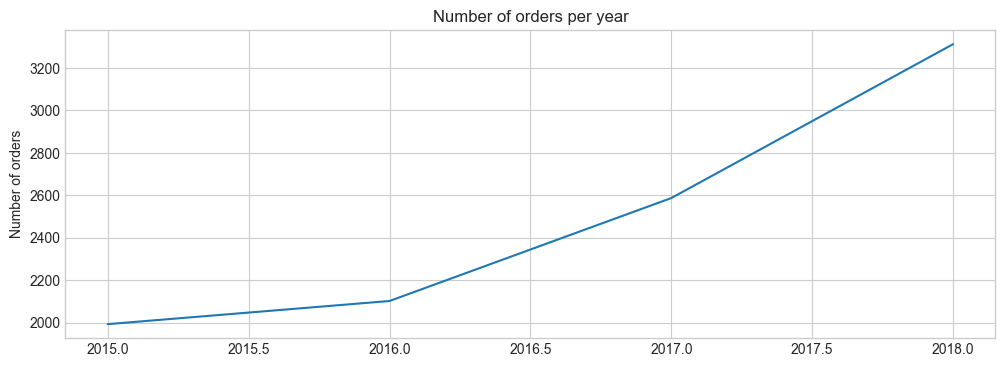

In [137]:
# Plot
fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(
    x='order_year', 
    y='order_id',
    data=num_order_of_year,
    ax=ax
)

ax.set_title('Number of orders per year')
ax.set_xlabel(None)
ax.set_ylabel('Number of orders')

plt.show()

- Mỗi tháng có bao nhiêu order?

In [139]:
#Truy vấn lấy dữ liệu month trong thuộc tính order_date
df["order_month"] = df["order_date"].dt.month
df.head()


,order_date,order_id,product_name,category,city,country,customer_name,discount,postal_code,manufacturer,...,region,sales,segment,ship_date,ship_mode,state,sub-category,order_year,orde_month,order_month
0,2017-11-08,CA-2017-152156,Bush Somerset Collection Bookcase,Furniture,Henderson,United States,Claire Gute,0.00,42420.0,Bush,...,South,262.0,Consumer,2017-11-11,Second Class,Kentucky,Bookcases,2017,11,11
1,2017-11-08,CA-2017-152156,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Henderson,United States,Claire Gute,0.00,42420.0,Hon,...,South,732.0,Consumer,2017-11-11,Second Class,Kentucky,Chairs,2017,11,11
2,2017-06-12,CA-2017-138688,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,90036.0,Universal,...,West,15.0,Corporate,2017-06-16,Second Class,California,Labels,2017,6,6
3,2016-10-11,US-2016-108966,Bretford CR4500 Series Slim Rectangular Table,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,33311.0,Bretford,...,South,958.0,Consumer,2016-10-18,Standard Class,Florida,Tables,2016,10,10
4,2016-10-11,US-2016-108966,Eldon Fold 'N Roll Cart System,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,33311.0,Eldon,...,South,22.0,Consumer,2016-10-18,Standard Class,Florida,Storage,2016,10,10


In [143]:
num_order_of_month = df.groupby(["order_year", "order_month"])["order_id"].count().reset_index()
num_order_of_month

,order_year,order_month,order_id
0,2015,1,79
1,2015,2,46
2,2015,3,157
3,2015,4,135
4,2015,5,122
5,2015,6,135
6,2015,7,143
7,2015,8,153
8,2015,9,268
9,2015,10,159


### 4.3. Doanh thu

- Lấy ra các đơn hàng của năm 2017

- Có bao nhiêu đơn hàng?

- Số đơn hàng mỗi tháng?

- Lấy ra top 10 sản phẩm có doanh số cao nhất 2017

- Lọc ra top 5 sub-categories có Sales nhiều nhất trong năm 2017

- Lọc ra các đơn hàng bị chuyển chậm hơn 3 ngày

- Có bao nhiêu đơn như vậy

- Đơn hàng trễ nhất là bao lâu?

### 4.4. Tăng trưởng Lợi nhuận

- Tăng trưởng lợi nhuận giữa các nhóm Khách hàng (Segment) của năm gần nhất so với năm trước đó là bao nhiêu?

### 4.5. Trình bày bảng Tăng trưởng Lợi nhuận

- Trình bày bảng với các nhóm Khách hàng (Segment) giờ đây sẽ trở thành từng cột riêng lẻ

Expectation: 3 cột Consumer, Corporate, Home Office